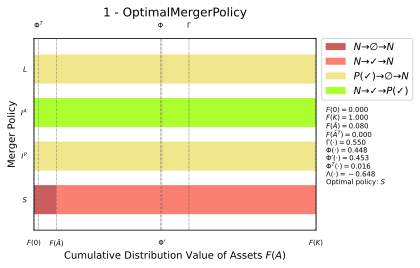

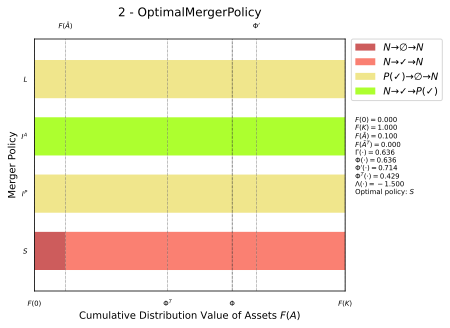

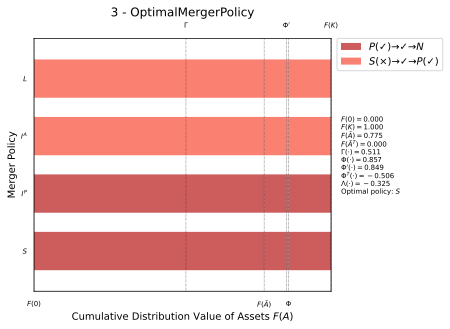

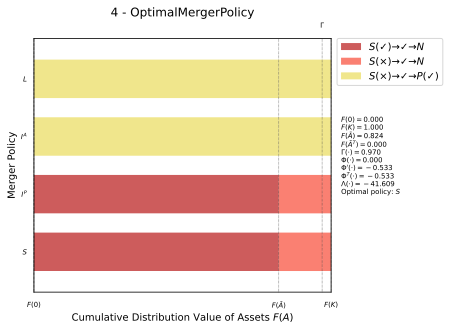

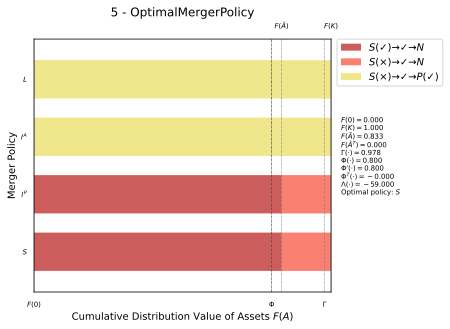

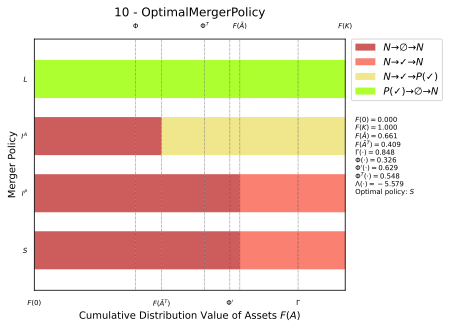

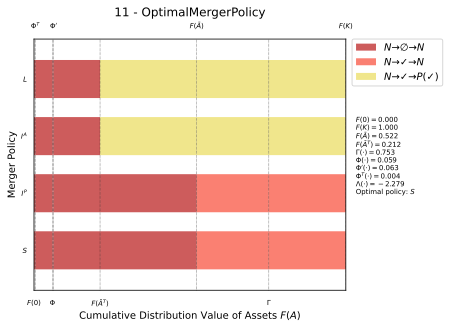

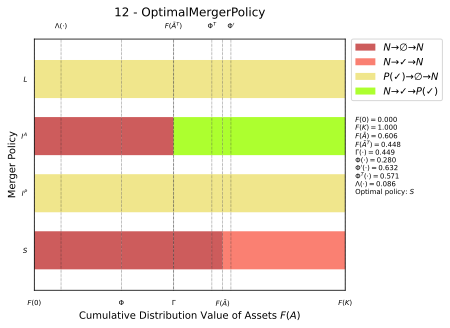

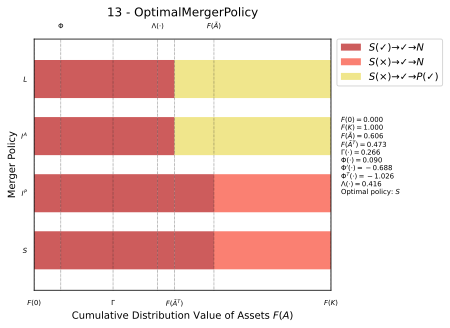

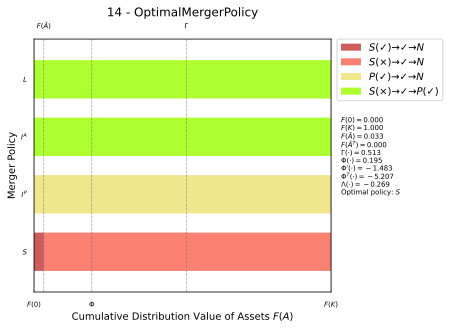

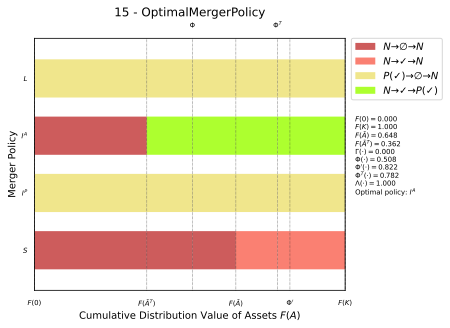

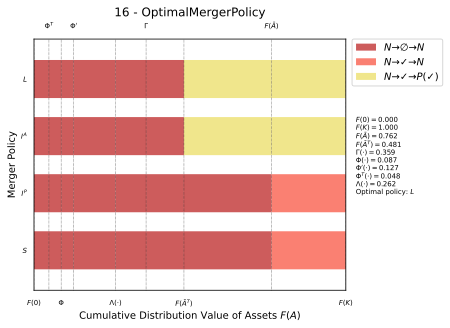

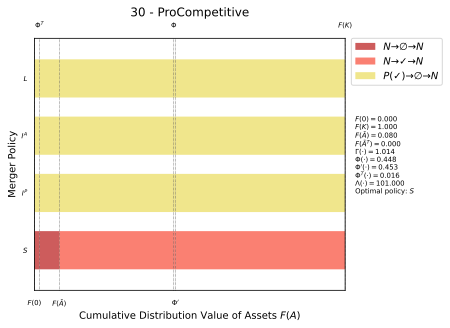

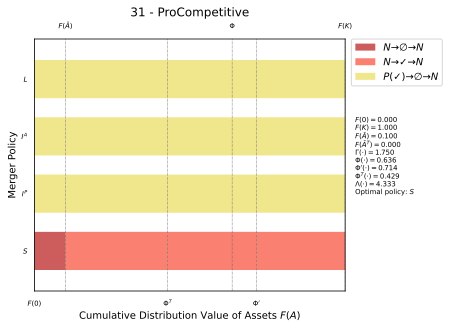

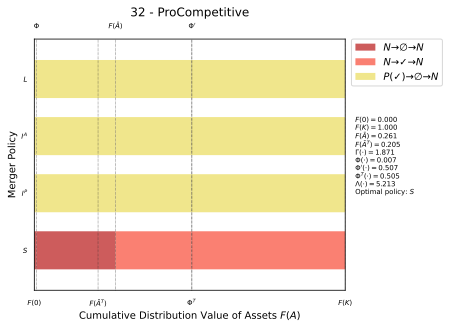

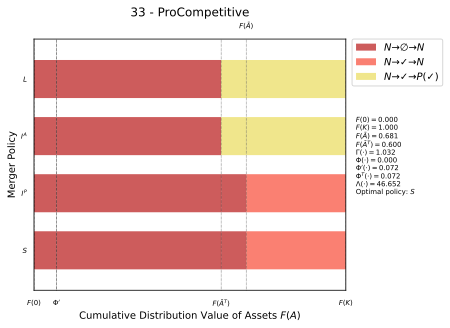

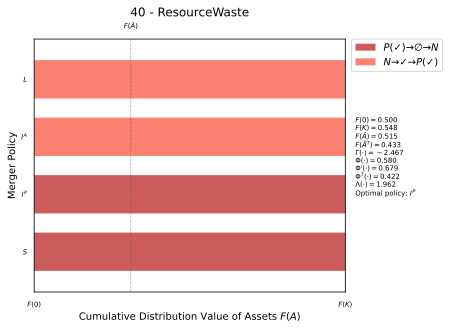

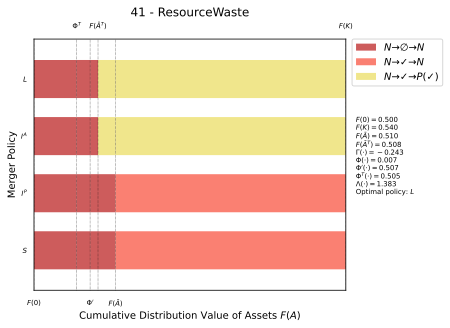

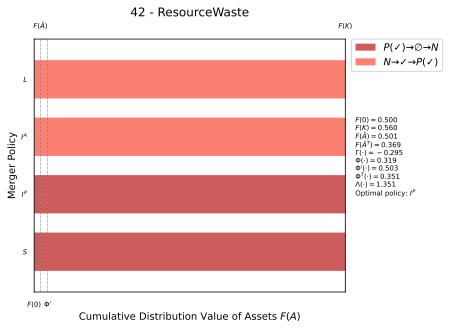

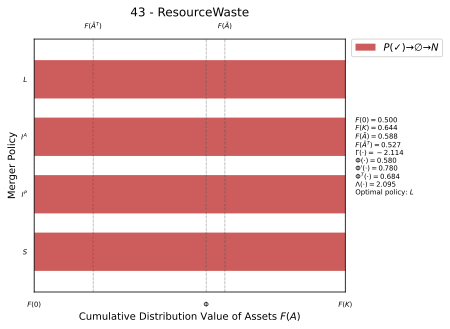

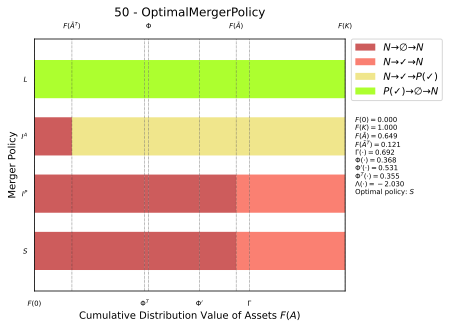

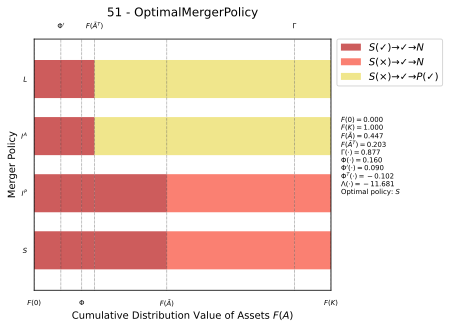

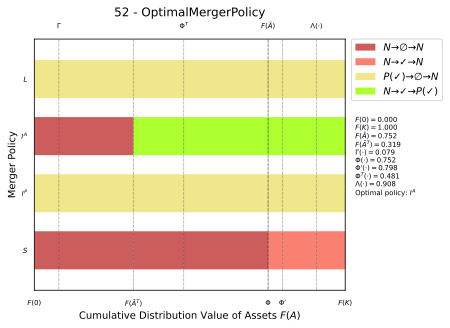

In [2]:
import Fumagalli_Motta_Tarantino_2020 as FMT20

%config InlineBackend.figure_format ='svg'

default_distribution = FMT20.Distributions.UniformDistribution

for i in range(1, 55):
    try:
        p = FMT20.LoadParameters(config_id=i)
    except FMT20.IDNotAvailableError:
        continue
    try:
        m = FMT20.OptimalMergerPolicy(**p(), asset_distribution=default_distribution)
        title = str(i) + " - OptimalMergerPolicy"
    except AssertionError:
        try:
            m = FMT20.ProCompetitive(**p(), asset_distribution=default_distribution)
            title = str(i) + " - ProCompetitive"
        except AssertionError:
            m = FMT20.ResourceWaste(**p(), asset_distribution=FMT20.Distributions.NormalDistribution)
            title = str(i) + " - ResourceWaste"

    v: FMT20.IVisualize = FMT20.MergerPoliciesAssetRange(m)
    v.show(
        legend=False, thresholds=True, optimal_policy=True, title=title, y_offset=-30
    )